# STA 208: Homework 4
This is based on the material in Chapters 5,6 of 'Elements of Statistical Learning' (ESL), in addition to lectures 10-13.

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements (beginning with __Exercise X.X__).  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

In the conceptual exercises you should provide an explanation, with math when necessary, for any answers.  When answering with math you should use basic LaTeX, as in 
$$E(Y|X=x) = \int_{\mathcal{Y}} f_{Y|X}(y|x) dy = \int_{\mathcal{Y}} \frac{f_{Y,X}(y,x)}{f_{X}(x)} dy$$
for displayed equations, and $R_{i,j} = 2^{-|i-j|}$ for inline equations.  (To see the contents of this cell in markdown, double click on it or hit Enter in escape mode.)  To see a list of latex math symbols see here: http://web.ift.uib.no/Teori/KURS/WRK/TeX/symALL.html

When writing pseudocode, you should use enumerated lists, such as 

__Algorithm: Ordinary Least Squares Fit__
(Input: X, y; 
Output: $\beta$)
1. Initialize the $p \times p$ Gram matrix, $G \gets 0$, and the vector $b \gets 0$.
2. For each sample, $x_i$:
 1. $G \gets G + x_i x_i^\top$.
 2. $b \gets b + y_i x_i$
3. Solve the linear system $G \beta = b$ and return $\beta$


## Transfusion dataset
Read in the transfusion data using the code below.

In [2]:
import numpy as np
from sklearn.preprocessing import scale

In [3]:
Dtrans = np.loadtxt("transfusion.data",dtype=np.str_,delimiter=",")
X = np.array(Dtrans[1:,0:4],dtype=float)
y = np.array(Dtrans[1:,4],dtype=float)
X = scale(X)

__Exercise 1.1__ (10 pts) Use 5-fold cross validation, leave-one-out CV, and a 50% holdout to tune the bandwidth and ridge penalty parameter for the RBF kernel for SVMs.  Qualitatively compare the results.

__Exercise 1.1__

In [4]:
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV,LeaveOneOut,train_test_split,KFold

In [9]:
#C_range=2.** np.arange(-10, 11)
#gamma_range=2.** np.arange(-10, 11)
C_range=np.logspace(-3,3,7)
gamma_range=np.logspace(-3,3,7)
#gamma_range=np.logspace(-10,3,6)
param_grid=dict(gamma=gamma_range,C=C_range)
svr=SVC(kernel='rbf')
# 5-fold cross validation
#cv=5 
cv1=KFold(n_splits=5,shuffle=True,random_state=23)
clf1=GridSearchCV(svr,param_grid,cv=cv1)

clf1.fit(X,y)
print clf1.best_params_
print clf1.best_score_


{'C': 1000.0, 'gamma': 0.10000000000000001}
0.798128342246


In [8]:

param_grid=dict(gamma=gamma_range,C=C_range)
svr=SVC(kernel='rbf')
# Leave-One-Out CV
loo=LeaveOneOut() 
clf2=GridSearchCV(svr,param_grid,cv=loo)
clf2.fit(X,y)
print clf2.best_params_
print clf2.best_score_

{'C': 1.0, 'gamma': 1.0}
0.794117647059


In [10]:
svr=SVC(kernel='rbf')
# 50% hold out CV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=23)
cv=StratifiedShuffleSplit(test_size=0.4,random_state=23)
clf3=GridSearchCV(svr,param_grid,cv=cv)
clf3.fit(X_train,y_train)
print clf3.best_params_
print clf3.best_score_

{'C': 1000.0, 'gamma': 0.10000000000000001}
0.781333333333


It can be seen from the results above that 5-folds and 50% hold-out cross-validation can provide the same he bandwidth and ridge penalty parameter for the RBF kernel for SVM, while leave-one-out gives very different parameters. The final scores of the three methods indicate that 5-fold cross-validation gives the largest score (0.798128342246), which is slightly larger than that of leave-one-out (0.794117647059), and 50% hold-out cross-validation generates the smallest score (0.781333333333).

__Exercise 1.2__ (10 pts) Select one of these methods for tuning the bandwidth parameters and make this a function that takes in a dataset, performs cross-validation, and outputs the tuning parameters.  Make a training and test set split and tune parameters for linear SVMs, RBF kernel SVMs, and logistic regression on the training set, then compare their performances on the test set using ROC and PR curves.

__Exercise 1.2__

In this problem, 5-fold cross validation is chosen.

In [27]:
import sklearn.linear_model as skl_lm
from sklearn.metrics import  precision_recall_curve, roc_curve,auc

In [28]:
# 40% fo the dataset is used for test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=23)

In [29]:
# linear SVM
svra=SVC(kernel='linear')
cv_1=KFold(n_splits=5,shuffle=True,random_state=23)
param_grid = dict(C=C_range)
clf_1=GridSearchCV(svra,param_grid,cv=cv_1)
clf_1.fit(X_train,y_train)
C1=clf_1.best_params_['C']

clf_1 = SVC(kernel = 'linear', C = C1, probability = True)

y_pred_1 = clf_1.fit(X_train, y_train).predict(X_test)

prob1 =clf_1.predict_proba(X_test) # save the probability for SVM

y_pred1=prob1[:,1]

preci1,rec1,thre1=precision_recall_curve(y_test,y_pred1) # PR curve information

fpr1,tpr1,threshold1=roc_curve(y_test,y_pred1) # ROC curve information







In [31]:
# RBF SVM
svrb=SVC(kernel='rbf')
cv_2=KFold(n_splits=5,shuffle=True,random_state=23)
param_grid=dict(gamma=gamma_range,C=C_range)
clf_2=GridSearchCV(svrb,param_grid,cv=cv_2)

clf_2.fit(X_train,y_train)
C2=clf_2.best_params_['C']
gamma2=clf_2.best_params_['gamma']

clf_2 = SVC(kernel = 'rbf', C = C2,gamma=gamma2, probability = True)

y_pred_2 = clf_2.fit(X_train, y_train).predict(X_test)

prob2 =clf_2.predict_proba(X_test) # save the probability for SVM

y_pred2=prob2[:,1]

preci2,rec2,thre2=precision_recall_curve(y_test,y_pred2) # PR curve information



fpr2,tpr2,threshold2=roc_curve(y_test,y_pred2) # ROC curve information



In [32]:
### logistic regression
lgm= skl_lm.LogisticRegression()

cv_3=KFold(n_splits=5,shuffle=True,random_state=23)
param_grid=dict(C=C_range)
clf_3=GridSearchCV(lgm,param_grid,cv=cv_2)

clf_3.fit(X_train,y_train)
C3=clf_3.best_params_['C']

clf_3 = skl_lm.LogisticRegression( C = C1)

clf_3.fit(X_train,y_train)
prob3 = clf_3.predict_proba(X_test) # save the probability for logistic regression
y_pred_3=clf_3.predict(X_test)

y_pred3=prob3[:,1]

preci3,rec3,thre3=precision_recall_curve(y_test,y_pred3)# PR curve information

fpr3,tpr3,threshold3=roc_curve(y_test,y_pred3)# ROC curve information




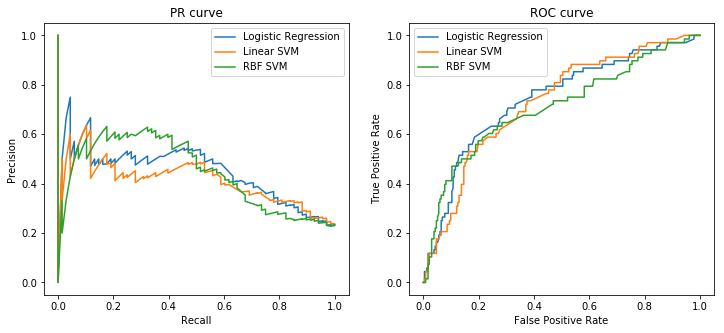

In [33]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
# left plot
ax1.plot(rec3,preci3,label='Logistic Regression')
ax1.plot(rec1,preci1,label='Linear SVM')
ax1.plot(rec2,preci2,label='RBF SVM')

ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR curve')

ax1.legend(loc=0)

# Right plot
ax2.plot(fpr3,tpr3,label='Logistic Regression')
ax2.plot(fpr1,tpr1,label='Linear SVM')
ax2.plot(fpr2,tpr2,label='RBF SVM')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC curve')
ax2.legend(loc=0)

fig

The results indicate RBF SVM performs the best among the three models.

## Reuters dataset
The following dataset contains stemmed words from the Reuters dataset, which is articles.  Each line starts with a topic label (of 8 topics) and then has all of the terms in the document.

In [35]:
from collections import Counter
import scipy.sparse as sp

In [36]:
def read_corpus(filename):
    """
    Read a R8 corpus
    Input: filename
    Output: the corpus which is a list of documents with topic labels and stemmed terms
    """
    corpus = []
    DF = Counter()
    with open(filename,"r") as f:
        for line in f:
            label, terms = line.split('\t')
            terms = terms.strip().split()
            label = label.strip()
            corpus.append([label,Counter(terms)])
            DF += Counter(set(terms))
    return(corpus, DF)

In [37]:
train_corpus, train_DF = read_corpus('r8-train-stemmed.txt')
test_corpus, test_DF = read_corpus('r8-test-stemmed.txt')

In [38]:
# You should use the document frequency for the whole corpus
full_DF = train_DF + test_DF

In [39]:
## dict_list is the list of dictionary terms, 
## while dict_index can take you from the term back to its index
dict_list = full_DF.keys()
dict_index = {t:i for i,t in enumerate(dict_list)}

In [40]:
n, p = len(train_corpus), len(full_DF)
logN = np.log(len(train_corpus) + len(test_corpus))

In [41]:
X_tr = sp.lil_matrix((n,p))

In [42]:
## This creates the sparse training matrix, you will need to modify this to create the test matrix.
## I am using a normalized TFIDF transform below, figure out what it is doing.
for i in xrange(n):
    tpc, doc = train_corpus[i]
    vec = np.array([(logN - np.log(train_DF[term]))*doc[term] for term in doc.keys()])
    vec = vec / np.linalg.norm(vec)
    X_tr[i,[dict_index[term] for term in doc.keys()]] = vec

__Exercise 2.1__ (10 pts) Compute Kmeans with 8 clusters on the training set.  For each cluster, what are the 10 terms that have the highest components in the cluster center vectors?  What are the sizes of the clusters?  Compute a 'confusion matrix' to compare these 8 clusters to the labelled topics (I want an 8 x 8 matrix of counts of documents in each topic and cluster - there are 8 topics).

In [43]:
from sklearn.cluster import KMeans

In [45]:
### Kmeans with 8 clusters
num_clusters = 8
km = KMeans(n_clusters=num_clusters,random_state=23)
%time km.fit(X_tr)
clusters = km.labels_.tolist()
from __future__ import print_function

### 10 terms that have the highest components in the cluster center vectors
Ntop=10
print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
for i in range(num_clusters):
    top10_terms = [dict_index.keys()[dict_index.values().index(term_index)] for term_index in order_centroids[i][:Ntop]]
    print('10 terms that have the highest components in the Cluster are ' + str(i) + ':' + ', '.join(top10_terms))



CPU times: user 1min 11s, sys: 710 ms, total: 1min 11s
Wall time: 36.5 s
Top terms per cluster:

10 terms that have the highest components in the Cluster 0:share, and, stock, for, compani, dlr, offer, inc, pct, corp
10 terms that have the highest components in the Cluster 1:stg, mln, monei, bank, profit, england, market, pretax, shortag, bill
10 terms that have the highest components in the Cluster 2:profit, loss, ct, net, shr, mln, rev, qtr, oper, dlr
10 terms that have the highest components in the Cluster 3:bank, billion, rate, pct, dlr, mln, earn, year, quarter, and
10 terms that have the highest components in the Cluster 4:trade, oil, japan, and, that, crude, price, japanes, barrel, offici
10 terms that have the highest components in the Cluster 5:qtly, div, ct, record, pai, prior, april, march, set, payout
10 terms that have the highest components in the Cluster 6:net, ct, shr, mln, rev, qtr, dlr, avg, oper, year
10 terms that have the highest components in the Cluster 7:loss, sh

In [50]:
label_size = {key: lab for key, lab in zip(range(len(train_corpus)), km.labels_)}
print ('The sizes of the 8 clusters are as follows: ')
Counter(label_size.values())

The sizes of the 8 clusters are as follows 


Counter({0: 2167, 1: 113, 2: 359, 3: 802, 4: 582, 5: 456, 6: 722, 7: 284})

In [51]:
## This creates the sparse training matrix for test matrix.
n_test, p = len(test_corpus), len(full_DF)
X_test = sp.lil_matrix((n_test,p))

for i in xrange(n_test):
    tpc, doc = test_corpus[i]
    vec = np.array([(logN - np.log(test_DF[term]))*doc[term] for term in doc.keys()])
    vec = vec / np.linalg.norm(vec)
    X_test[i,[dict_index[term] for term in doc.keys()]] = vec

In [ ]:
from sklearn.metrics import confusion_matrix

In [53]:
topics = {key: tpc for key, tpc in zip(range(len(test_corpus)), [test_corpus[i][0] for i in range(len(test_corpus))])}

confusion_dict = {}
for tpc in set(topics.values()):
    true_index = [k for k, v in topics.iteritems() if v == tpc]
    dict_count = {k: labels[k] for k in true_index }
    count = Counter(dict_count.values())
    confusion_dict[tpc] = {k: v for k, v in zip(count.keys(), count.values())}    

In [54]:
def loc(key):
    loc = []
    for i in range(num_clusters):
        try:
            loc.append(confusion_dict[key][i])
        except KeyError:
            loc.append(0)
    return loc

In [56]:
confusionmatrix = np.array([loc(key) for key in confusion_dict.keys()])
print (' The Confusion Matrix is as follows:')
confusionmatrix # rows are topics, columns are clusters

 The Confusion Matrix is as follows:


array([[398,  21,  73, 141, 135, 106, 165,  44],
       [ 31,   1,  10,  12,   8,   9,  12,   4],
       [ 36,   0,   8,   7,  10,   5,   5,   4],
       [275,  12,  58,  99,  66,  65,  95,  26],
       [  4,   0,   3,   1,   1,   0,   1,   0],
       [ 29,   2,   5,  11,  12,   4,  12,   6],
       [ 67,   0,   2,  17,  10,   8,  15,   2],
       [ 15,   0,   1,   2,   4,   5,   8,   1]])

__Exercise 2.2__ (10 pts) Reverse the roles of words and documents and perform hierarchical agglomerative clustering (you can just transpose X) up to 40 clusters.  Compare the dendrograms for three different linkage types, and try to make sense of the resulting clusters.

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

In [58]:
n_mostcommon=1000 # choose 1000 most common words in training set
common_words = sorted(train_DF.items(), key=lambda (k, v): v, reverse=True)[:n_mostcommon]
words = [common_words[i][0] for i in range(n_mostcommon)]

n, p = len(train_corpus), n_mostcommon
logN = np.log(len(train_corpus) + len(test_corpus))

X_tr_n = np.empty([n,p], dtype=float)

for i in xrange(n):
    tpc, doc = train_corpus[i]
    doc_n = {}
    for k, v in zip(doc.keys(), doc.values()):
        if k in words:
            doc_n[k] = v
            
    dict_index_n = {k:v for k,v in zip(words, range(1000))}
            
    vec = np.array([(logN - np.log(train_DF[term]))*doc_n[term] for term in doc_n.keys()])
    vec = vec / np.linalg.norm(vec)
    X_tr_n[i,[dict_index_n[term] for term in doc_n.keys()]] = vec

X_tr_n_i = X_tr_n.transpose()

In [59]:
from scipy.cluster import hierarchy
import sys

In [60]:
sys.setrecursionlimit(10*n_mostcommon)

linkage type=single


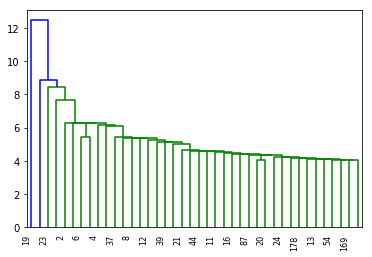

In [72]:
print ("linkage type=single")
link1 = hierarchy.linkage(X_tr_n_i, 'single')

fig1, ax = plt.subplots()
dn = hierarchy.dendrogram(link1, p=40, truncate_mode = 'lastp')
plt.xticks(rotation=90)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 20))
fig1

linkage type=average


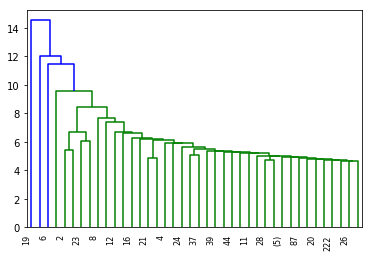

In [73]:
print ("linkage type=average")
fig2, ax = plt.subplots()
link3 = hierarchy.linkage(X_tr_n_i, 'average')
dn = hierarchy.dendrogram(link3, p=40, truncate_mode = 'lastp')
plt.xticks(rotation=90)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 20))
fig2


linkage type= complete


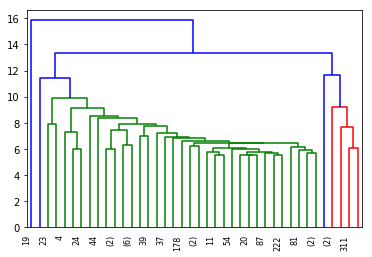

In [74]:
print ("linkage type= complete")
fig3, ax = plt.subplots()
link2 = hierarchy.linkage(X_tr_n_i, 'complete')
dn = hierarchy.dendrogram(link2, p=40, truncate_mode = 'lastp')
plt.xticks(rotation=90)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 20))
fig3



__Exercise 2.3__ (10 pts) Use SVMs trained on the training set to predict the test set.  Evaluate the performance with the ROC, PR, and confusion matrix.  Don't forget to appropriately cross-validate to tune parameters.

In this problem, we choose linear SVM for an less time-consuming way of tuning parameters. 

In [76]:
# train response
y_train = [train_corpus[i][0] for i in range(len(train_corpus))]
# test response
y_test = [test_corpus[i][0] for i in range(len(test_corpus))]

In [ ]:
# tune parameters for linear SVM
svrb=SVC(kernel='linear')
cv=KFold(n_splits=5,shuffle=True,random_state=23)
param_grid=dict(C=C_range)
clf=GridSearchCV(svrb,param_grid,cv=cv)

clf.fit(X_tr,y_train)
C=clf.best_params_['C']


clf = SVC(kernel = 'linear', C = C, probability = True)

clf.fit(X_tr,y_train)


In [82]:
from sklearn.metrics import confusion_matrix

In [83]:
print(confusion_matrix(y_test, clf.predict(X_test)))

[[ 681    1   12    0    0    0    0    2]
 [   5  113    0    0    0    0    2    1]
 [   6    0 1077    0    0    0    0    0]
 [   0    0    0   10    0    0    0    0]
 [   2    0    0    0   68   10    0    1]
 [   5    0    1    0    6   73    0    2]
 [   6    3    0    0    0    0   27    0]
 [   2    0    0    0    0    0    0   73]]


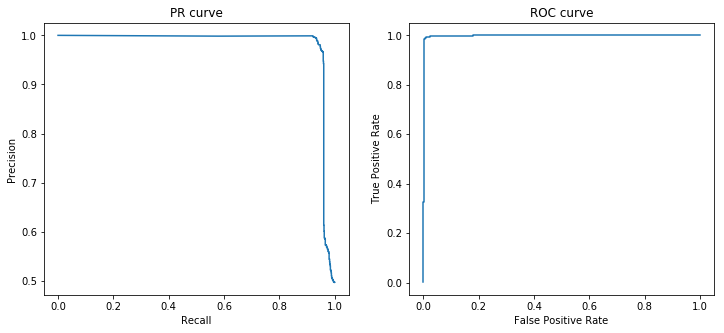

In [86]:
y_train_new = [1 if label == 'earn' else 0 for label in y_train]
y_test_new = [1 if label == 'earn' else 0 for label in y_test]
clf.fit(X_tr, y_train_new)
y_score = clf.decision_function(X_test)

# creating plot
fig4, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
# Left plot
y_prob_pred = [max(prob) for prob in clf.predict_proba(X_test)] 

preci,rec,thre=precision_recall_curve(y_test_new,y_prob_pred)# PR curve information
ax1.plot(rec,preci)
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR curve')

# Right plot
fpr, tpr, thresholds = roc_curve(y_test_new, y_score)
ax2.plot(fpr,tpr)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC curve')

fig4